In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [23]:
# Stats for a player in a season
hdfp = pd.read_csv("nba-raptor/historical_RAPTOR_by_player.csv")
ldfp = pd.read_csv("nba-raptor/latest_RAPTOR_by_player.csv")
mdfp = pd.read_csv("nba-raptor/modern_RAPTOR_by_player.csv")

In [160]:
# A player's modern RAPTOR stats (calculated 2013/14 season onwards)
mdfp.head()

,player_name,player_id,season,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,...,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
0,Alex Abrines,abrinal01,2017,2387,1135,0.745505,-0.372938,0.372567,-0.418553,-3.857011,...,0.543421,-1.144832,-0.601411,1.249008,1.447708,-0.198700,0.077102,-1.038677,-0.961575,0.326413
1,Alex Abrines,abrinal01,2018,2546,1244,0.317549,-1.725325,-1.407776,-1.291727,-0.049694,...,-0.020826,-1.502642,-1.523468,0.777304,0.465912,0.311392,-0.174621,-1.112625,-1.287247,-0.456141
2,Alex Abrines,abrinal01,2019,1279,588,-3.215683,1.078399,-2.137285,-6.158856,4.901168,...,-4.040157,1.885618,-2.154538,0.178167,0.178167,0.000000,-4.577678,1.543282,-3.034396,-0.268013
3,Precious Achiuwa,achiupr01,2021,1581,749,-4.122966,1.359278,-2.763688,-4.050779,-0.919712,...,-4.347596,0.954821,-3.392775,-0.246055,-0.246776,0.000721,-3.817713,0.474828,-3.342885,0.329157
4,Precious Achiuwa,achiupr01,2022,3802,1892,-2.521510,1.763502,-0.758008,-1.687893,3.103441,...,-2.517372,2.144151,-0.373221,2.262658,2.309611,-0.046953,-2.483956,2.024360,-0.459596,-0.728609


In [170]:
print('Number of null values by column\n')
for col in mdfp.columns:
    print(f"{col}:{' ' * (15 - len(col))}{mdfp[col].isnull().sum()}")

Number of null values by column

player_name:    0
player_id:      0
season:         0
poss:           0
mp:             0
raptor_box_offense:1
raptor_box_defense:1
raptor_box_total:1
raptor_onoff_offense:1
raptor_onoff_defense:1
raptor_onoff_total:1
raptor_offense: 0
raptor_defense: 0
raptor_total:   0
war_total:      0
war_reg_season: 0
war_playoffs:   0
predator_offense:0
predator_defense:0
predator_total: 0
pace_impact:    1


*We can see there are hardly any missing values in this (historical stats) dataframe. The same is the case for the modern and latest stats datasets. This is because if a player plays even a few games in a season, it is possible to calculate these stats, and if he does not play a single game in a season (through injury for example), then there simply is no entry for that player for that year.*

In [24]:
# Stats for a player in a season for a team
hdft = pd.read_csv("nba-raptor/historical_RAPTOR_by_team.csv")
ldft = pd.read_csv("nba-raptor/latest_RAPTOR_by_team.csv")
mdft = pd.read_csv("nba-raptor/modern_RAPTOR_by_team.csv")

In [165]:
hdft.head()

,player_name,player_id,season,season_type,team,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
0,Alaa Abdelnaby,abdelal01,1991,PO,POR,26,13,-6.565556,-1.999625,-8.565181,-0.039028,0.000000,-0.039028,-6.966437,-4.170021,-11.136458,-1.785247
1,Alaa Abdelnaby,abdelal01,1991,RS,POR,614,290,-3.827204,-0.447001,-4.274205,-0.226163,-0.226163,0.000000,-3.776125,-1.592067,-5.368192,0.283274
2,Alaa Abdelnaby,abdelal01,1992,PO,POR,50,25,-5.430838,-3.112862,-8.543700,-0.077215,0.000000,-0.077215,-5.722269,-4.144577,-9.866847,1.216643
3,Alaa Abdelnaby,abdelal01,1992,RS,POR,1948,934,-2.480005,-0.123125,-2.603129,0.070322,0.070322,0.000000,-2.416858,-0.634025,-3.050883,0.466668
4,Alaa Abdelnaby,abdelal01,1993,PO,BOS,128,68,-9.774333,-3.596499,-13.370831,-0.381918,0.000000,-0.381918,-9.480059,-4.481334,-13.961393,0.456135


In [173]:
print('Number of null values by column\n')
for col in hdft.columns:
    print(f"{col}:{' ' * (15 - len(col))}{hdft[col].isnull().sum()}")

Number of null values by column

player_name:    0
player_id:      0
season:         0
season_type:    0
team:           0
poss:           0
mp:             0
raptor_offense: 0
raptor_defense: 0
raptor_total:   0
war_total:      2
war_reg_season: 1
war_playoffs:   1
predator_offense:0
predator_defense:0
predator_total: 0
pace_impact:    2


*For a very similar reason to the player dataframes, the raptor datasets by teams (historical, latest and modern), have almost no missing values.*

### RAPTOR Metrics
**The three datasets mean the following**
- Historical: RAPTOR stats calculated from 1976-77 NBA season to the previous season, the 2021-22 season.
- Latest: Modern RAPTOR stats calculated for the current 2022-23 NBA season.
- Modern: Modern RAPTOR stats calculated from the 2013-14 NBA season to the previous season, the 2021-22 season.
*The six RAPTOR metrics at the bottom were started to be calculated from the 2013-14 NBA season since the league started tracking these advanced stats from then. These are present in the latest and modern dataframe but not in the historical dataframe. Hence, any visualisations involving these metrics will include only this data.*

In [32]:
print("The modern RAPTOR metrics are:")
for x in ldfp.columns:
    if x not in hdfp.columns:
        print(x)

The modern RAPTOR metrics are:
raptor_box_offense
raptor_box_defense
raptor_box_total
raptor_onoff_offense
raptor_onoff_defense
raptor_onoff_total


### RAPTOR metrics in Action
*We plot the modern raptor totals for some of the most prominent players in the league. This plot highlights some of the best individual seasons that players. We will use these metrics to analyse player performance.*

In [174]:
players = ['LeBron James', 'Stephen Curry', 'DeMar DeRozan', 'Carmelo Anthony']

In [175]:
years = [i for i in range(2014, 2023)]

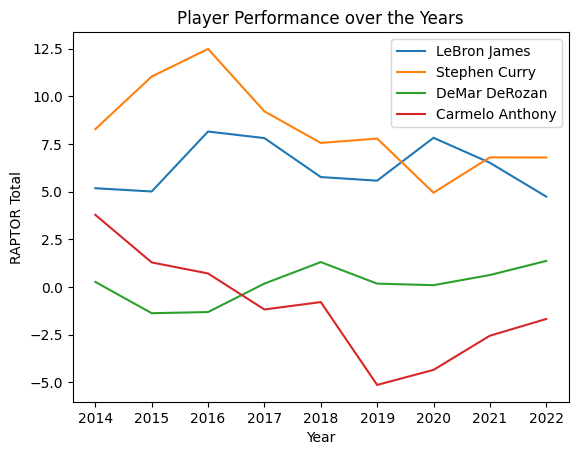

In [176]:
for i in range(4):
    plt.plot(years, mdfp[mdfp['player_name'] == players[i]]['raptor_total'], label=players[i])
plt.legend(loc="upper right")
plt.title("Player Performance over the Years")
plt.xlabel("Year")
plt.ylabel("RAPTOR Total")
plt.show()

### Players that missed an Entire Season
*Some players missed out entire NBA seasons. This is mostly due to injury. In such cases we don't have the RAPTOR scores for them for that year.
This is "missing data" for us in the sense that for that year, we don't have the stats for the player. We can drop players who don't fit a certain criteria of having played a certain number of games every season, depending on our task at hand.
On the other hand, it can be interesting to see what their drop-off was post injury.*

In [177]:
players_names = mdfp['player_name'].sample(frac=1).unique()

**Looking specifically at players that missed exactly one season in the period since modern metrics were introduced.**

In [178]:
injured_players = []
injury_year = []
for pname in players_names:
    if (len(mdfp[mdfp['player_name'] == pname]) == 8) and ({2014, 2022} <= set(mdfp[mdfp['player_name'] == pname]['season'])): # player has just missed one season
        injured_players.append(pname)
        injury_year.append(list({i for i in range(2014, 2023)}-set(mdfp[mdfp['player_name'] == pname]['season']))[0])
        if len(injured_players) == 4:
            break

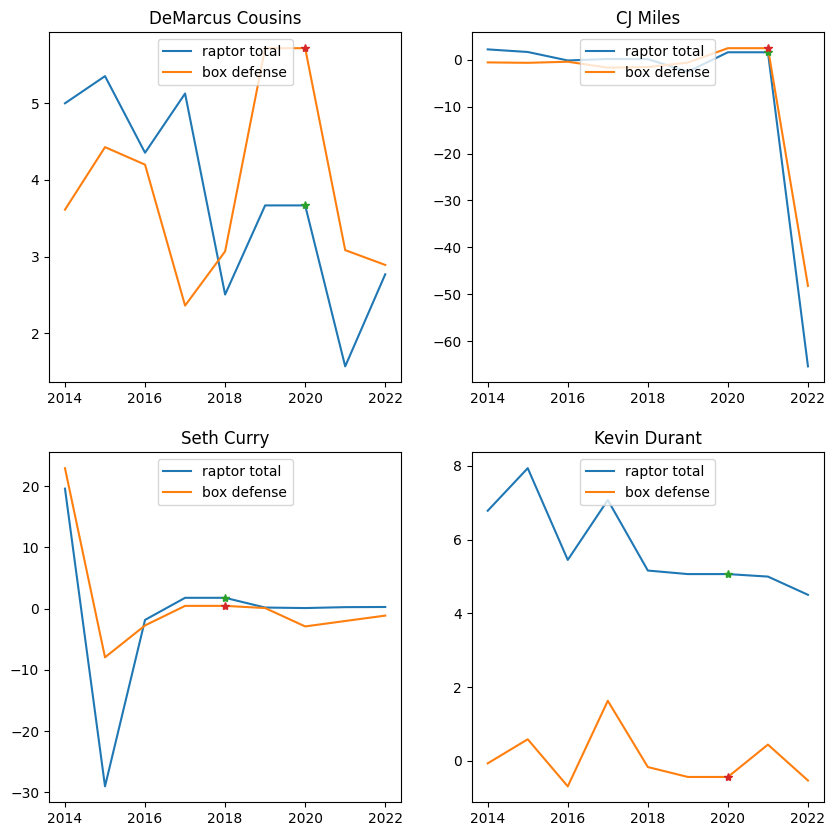

In [180]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
ind = 0

for row in ax:
    for col in row:
        yr = injury_year[ind]
        pname = injured_players[ind]
        raptor = dict(zip(mdfp[mdfp['player_name'] == pname]['season'], mdfp[mdfp['player_name'] == pname]['raptor_total']))
        box = dict(zip(mdfp[mdfp['player_name'] == pname]['season'], mdfp[mdfp['player_name'] == pname]['raptor_box_defense']))
        # raptor[yr] = (raptor[yr+1] + raptor[yr-1]) / 2
        raptor[yr] = raptor[yr-1]
        box[yr] = box[yr-1]
        col.plot(*zip(*sorted(raptor.items())), "-", label='raptor total')
        col.plot(*zip(*sorted(box.items())),  "-", label='box defense')
        col.plot(yr, raptor[yr], marker="*")
        col.plot(yr, box[yr], marker="*")
        col.title.set_text(pname)
        col.legend(loc="upper center")
        # col.show()
        ind += 1

**From the plots above we can see that there is a dropoff for players after injury. We could expand upon this idea through some visualisations.**

In [226]:
player_team = mdft.groupby(['player_name', 'team']).agg({'raptor_total': sum})
pmax, pmin, pdiff = dict(), dict(), dict()
diff = 0
maxteam = ''
minteam = ''
theplayer = ''
maxt, mint = '', ''
bestp, bestt = '', ''
best = 0
for ((name, team), score) in zip(player_team['raptor_total'].index, player_team['raptor_total']):
    if name not in pmax:
        maxt = team
        mint = team
        pmax[name] = score
        pmin[name] = score
    else:
        pmax[name] = max(pmax[name], score)
        pmin[name] = min(pmin[name], score)
        if pmax[name] == score:
            maxt = team
        if pmin[name] == score:
            mint = team
    if pmax[name] - pmin[name] > diff:
        diff = pmax[name] - pmin[name]
        maxteam = maxt
        minteam = mint
        theplayer = name
    if score > best:
        best = score
        bestp = name
        bestt = team
print(theplayer, maxteam, minteam)
print(diff)
print(bestp, bestt)

Alize Johnson IND CHI
111.80465521448747
Stephen Curry GSW


In [231]:
print(f"The player with the highest total RAPTOR SCORE at a given team has been {bestp} at {bestt} with a cumulative RAPTOR score of {best:.2f}")

The player with the highest total RAPTOR SCORE at a given team has been Stephen Curry at GSW with a cumulative RAPTOR score of 136.80


In [230]:
print(f"The player with the largest difference between total RAPTOR score is {theplayer}, with {pmax[theplayer]:.2f} at {maxteam} and {pmin[theplayer]:.2f} at {minteam}")

The player with the largest difference between total RAPTOR score is Alize Johnson, with 99.09 at IND and -12.72 at CHI
